# HW1: Practice with Python, hard-margin SVM, and linear regression

## Sichan Kim 
## skim932@wisc.edu

Hello Students:

- Start by downloading HW1.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- I've included the output from my solution in HW1.html so you can check your
  work. Your output should match or be close to mine. Use 3 significant
  figures for floats. e.g. We can print 3 figures for 𝜋/1000 as
  print(f'{np.pi/1000:.3}'). The pattern is print(f'{x:.precision}'),
  where x is the value to print and precision is the number of figures.
- If you have questions, please ask them in class or office hours. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- Please clean up your code:
  - Comment out unnecessary code that is useful for orienting you, like printing the data set.
  - Label your output, like writing 'weight=20.1' or 'The weight is 20.1' rather than just '20.1'.
  - Simplify your code if you can.
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW01.ipynb to Canvas's HW01.ipynb assignment
  - HW01.html to Canvas's HW01.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2a, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, linear_model, datasets


from io import StringIO # to treat a string as a file

from mpl_toolkits.mplot3d import Axes3D

# 1. Use a hard-margin SVM
 to classify cars as having automatic or manual transmissions.
- Read [http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv](http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv) into a DataFrame. (This is the mtcars data frame from R with two of its rows removed to get linearly separable data.)
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0).)
- Make X from the mpg (miles per gallon) and wt (weight in 1000s of pounds) columns. Make y from the am column (where 0=automatic
  or 1=manual transmission).
- Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
- Report the training accuracy. (It's given by clf.score(X, y).)
- Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg.
- Use five plt.plot() calls to make a figure with wt on its x-axis and mpg on its y-axis including:
  - the automatic transmission cars in red
  - the manual transmission cars in blue
  - the decision boundary (the center line of the road)
  - the lower margin boundary (the left side of the road)
  - the upper margin boundary (the right side of the road)
  - a reasonable title, axis labels, and legend

In [2]:
# Read http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv into a DataFrame. (This is the mtcars data frame from R with two of its rows removed to get linearly separable data.)
# (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0).)
df_1 = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0)
df_1

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [3]:
# Make X from the mpg (miles per gallon) and wt (weight in 1000s of pounds) columns. 
# Make y from the am column (where 0=automatic or 1=manual transmission).
# Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
X = np.array(df_1.iloc[:, [5,0]])
y = np.array(df_1.iloc[:, 8])
clf = svm.SVC(kernel="linear", C=1000) 
clf.fit(X, y) 
# print(X)
# print(y)
# print()
print(f'clf.coef_={clf.coef_}')
print(f'clf.intercept_={clf.intercept_}')

clf.coef_=[[-8.24431115 -0.30922192]]
clf.intercept_=[32.01974189]


In [4]:
# Report the training accuracy. (It's given by clf.score(X, y).)
training_accuracy = clf.score(X, y)
training_accuracy

1.0

In [5]:
# Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg.
clf.coef_[0,0]*4+clf.coef_[0,1]*20+clf.intercept_[0]

-7.141941199473251

The decision boundary is -8.24 * weight + -0.309 * milage + 32.0 = 0.
The training accuracy is 1.0.
We predict that a car weighing 4 thousand pounds that gets 20 mpg has transmission type 0 (where 0=automatic, 1=manual).


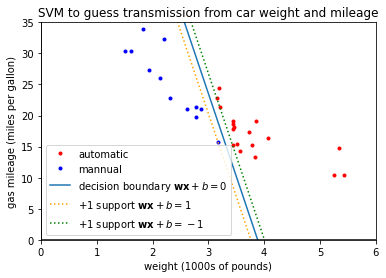

In [6]:
print(f'The decision boundary is {round(clf.coef_[0][0],2)} * weight + {round(clf.coef_[0][1],3)} * milage + {round(clf.intercept_[0],1)} = 0.')
print(f'The training accuracy is {training_accuracy}.')
print(f'We predict that a car weighing 4 thousand pounds that gets 20 mpg has transmission type 0 (where 0=automatic, 1=manual).')
# plt.subplots(figsize=(9,6)) 
plt.plot(X[y == 0, 0], X[y == 0, 1], '.r', label='automatic')
plt.plot(X[y ==  1, 0], X[y ==  1, 1], '.', color='blue', label='mannual')

# plt.grid()
plt.xlim(0,6)
plt.ylim(0, 35)

x1 = np.linspace(0, 6)
x2 = -(clf.coef_[0][0] * x1 + clf.intercept_[0]) / clf.coef_[0][1]
plt.plot(x1, x2, label=r'decision boundary $\mathbf{wx} + b = 0$')
plt.plot(x1, x2 + 1 / clf.coef_[0][1], linestyle=':', color='orange', label=r'+1 support $\mathbf{wx} + b =  1$')
plt.plot(x1, x2 - 1 / clf.coef_[0][1], linestyle=':', color='green', label=r'+1 support $\mathbf{wx} + b = -1$')

plt.axvline(x=0, c='k')
plt.axhline(y=0, c='k')


plt.title('SVM to guess transmission from car weight and mileage')
plt.xlabel("weight (1000s of pounds)")
plt.ylabel('gas mileage (miles per gallon)')
plt.legend(loc='lower left')
plt.show(block=False)

# 2. Make three linear regression models.


## 2a: Make a simple regression model by hand.
Use the matrix formula $w = (X^T X)^{-1} X^T y$ we developed in class to fit these three points:
(0, 5), (2, 1), (4, 3). (Use linear_model.linearRegression(), if you wish, to check your work.)

... your answer here (just give the model, $y = w x + b$, specifying its slope and intercept) ...


intercept=4.0, slope=-0.5


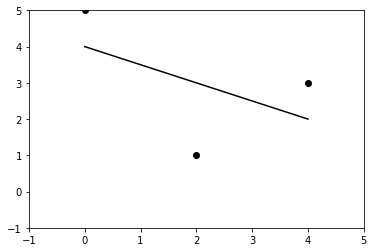

In [7]:
X = [[0], [2], [4]]
y = [5, 1, 3]
model = linear_model.LinearRegression()
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
print(f'intercept={round(b,1)}, slope={round(w,1)}')

# plt.subplots(figsize=(9,6)) 
y_hat = model.predict(X)


plt.scatter(X,y,color='black')
plt.xlim(-1,5)
plt.ylim(-1, 5)
plt.plot(X, y_hat, color='black',
         label=f'$\\hat{{y}}=${round(b, 2)} + ({round(w, 2)})$x$')

## 2b: Make a simple linear regression model from real data.
Estimate the average daily trading volume of a Dow Jones Industrial Average stock from its market capitalization. That is, use $y = $ AvgVol vs. $x =$ MarketCap.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv](http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv) into a DataFrame.
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol').)
- Find the model. Print its equation.
- Print its $R^2$ value (the proportion of variability in $y$ accounted for by $x$ via the linear model, given by model.score(X, y)).
- Make a plot of the data and model line.
- Use the model to predict the volume for a company with market capitalization of 0.25e12 (a quarter-trillion dollars); add this as a red point on your plot.
- Say what happens to Volume as Market Capitalization increases. (Use a Markdown cell.)

In [8]:
df_2 = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol')
df_2

,Exchange,Industry,State,Price,MarketCap,AvgVol
Symbol,,,,,,
MMM,NYSE,Conglomerate,Minnesota,157.0,8.985700e+10,2690000.0
AXP,NYSE,Financial,New York,198.0,1.503370e+11,4330000.0
AMGN,NASDAQ,Biopharmaceutical,California,224.0,1.249590e+11,3110000.0
AAPL,NASDAQ,IT,California,173.0,2.820000e+12,103560000.0
BA,NYSE,Aerospace,Illinois,218.0,1.269370e+11,10350000.0
CAT,NYSE,Construction,Illinois,203.0,1.100330e+11,3450000.0
CVX,NYSE,Petroleum,California,134.0,2.588120e+11,12440000.0
CSCO,NASDAQ,IT,California,54.0,2.288900e+11,23770000.0
KO,NYSE,Soft Drink,Georgia,61.0,2.634360e+11,19550000.0


In [9]:
X = df_2[['MarketCap']]
y = df_2['AvgVol']
model = linear_model.LinearRegression()
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]

In [10]:
print(b)
print(w)

3408894.8726414125
2.6758424874802997e-05


In [11]:
m=  0.25e12
y_1 = w*m+b

In [12]:
data = pd.read_csv("DJIA.csv")
x = np.array(data.iloc[:, [5]])
y = np.array(data.iloc[:, 6])
model = linear_model.LinearRegression()
model.fit(x, y)
b = model.intercept_
w = model.coef_[0]
print(f'intercept={b}, slope={w}')

intercept=3408894.8726414125, slope=2.6758424874802997e-05


The model is Volume = 2.68e-05 * (Market Capitalization) + 3.41e+06
R^2 is 0.705.
We predict a Volume of 1.01e+07 for a company with Market Capitalization 2.5e+11 (see the red dot).


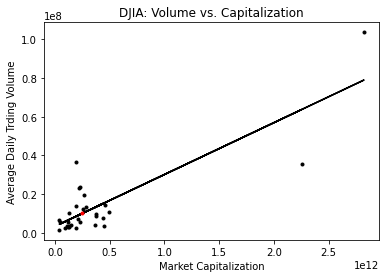

array([10098501.09134216])

In [13]:
print(f'The model is Volume = {format(w,".2e")} * (Market Capitalization) + {format(b,".2e")}')
print(f'R^2 is {round(model.score(x, y),3)}.')
print(f'We predict a Volume of {format(y_1,".2e")} for a company with Market Capitalization {format(m,".1e")} (see the red dot).')

y_hat = model.predict(x) # equivalent to y_hat = w * X[:, 0] + b
plt.plot(x, y, '.', color='black', label='data')
plt.title('DJIA: Volume vs. Capitalization')
plt.xlabel('Market Capitalization')
plt.ylabel('Average Daily Trding Volume')
plt.plot(x, y_hat, color='black',
         label=f'$\\hat{{y}}=${round(b, 2)} + ({round(w, 2)})$x$')
plt.plot(m,y_1, '.', color='red')
plt.show(block=False)
model.predict(np.array([[m]]))

### It can be seen that the value of the volume also increases as the market capitalization increases.

## 2c Make a multiple regression model.
Estimate the same volume from both market capitalization and price. That is, use $y =$ AvgVol vs. $x_1 =$ MarketCap and $x_2 =$ Price.
- Find the model.
- Print its equation.
- Print its $R^2$ value.
- Say what happens to Volume as Market Capitalization increases and what happens to Volume as Price increases (while holding the other variable fixed). (Use a Markdown cell.)

In [14]:
data = pd.read_csv("DJIA.csv")
X = np.array(data.iloc[:, [4,5]])
y = np.array(data.iloc[:, 6])
model = linear_model.LinearRegression()
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
w1 = model.coef_[1]
print(f'intercept={b}, slope={w,w1}')

intercept=14425755.696340684, slope=(-66935.34688008374, 2.8930749430540465e-05)


In [15]:
print(f'The model is Volume = {format(w1,".2e")} * (Market Capitalization) {format(w,".2e")} * Price + {format(b,".2e")}')
print(f'R^2 is {round(model.score(X, y),3)}')


The model is Volume = 2.89e-05 * (Market Capitalization) -6.69e+04 * Price + 1.44e+07
R^2 is 0.823


### As the market capitalization increases, the volume value also increases. On the other hand, the volume value decreases as the price increases.